<h2><b><p align = 'center'>Monstrinho 3 - 
O caixeiro que prefere cidades ímpares</p></h2>

<h4>
<b>Doscente:</b> Daniel Cassar<br>
<b>Disciplina:</b> Redes Neurais e Algoritmos Genéticos<br>
<b>Discentes:</b> Diogo Pereira, José David e Mayllon Emmanoel</h4>



<h3><b>Objetivo:</b> Encontre o caminho de menor distância no problema do caixeiro viajante
que prefere cidades ímpares e mostre ele de forma gráfica.</h3>

<h5><p align = 'justify'><b>Considerações do experimento:</b> Considere um número n ≥7 de coordenadas (x, y)
de cidades (cada cidade o cupa uma posição (x, y) diferente). Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só
anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto
na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma
vez. Além disso, atribua um número inteiro para cada uma das n cidades que o caixeiro
irá visitar, iniciando a contagem pelo número zero e aumentando esse número de 1 em 1.
O caixeiro deverá necessariamente visitar primeiro as cidades com números ímpares antes
das cidades com números pares. A cidade de número zero deve ser a cidade inicial. </p> </h5>

In [963]:
import random
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from numpy import linalg

<h5><p align = 'justify'> A célula abaixo contém todas as funções necessárias para a resolução do experimento. É importante ressaltar que todas essas funções são adaptações das funções feitas por Daniel Cassar em seu material didático ATP-303 GA 5.2 - Notebook caixeiro viajante, com exceção da função de criação de cidades aleatórias. <sup>[1]</sup></br></br>
Os processos mais adaptados ao problema para que não fossem gerados indivíduos inválidos são: </br></br>
<ul>
<b><li>Criação de canditados:</b> a criação de cada um dos indivíduos da primeira população ocorre pela criação de duas listas — uma contendo as cidades de número impar e outra com as cidade de número par. Ambas as listas são criadas pela iteração de <i>aranges numpy</i> gerados considerando os valores máximos das cidades pares e ímpares. Nesse processo de iteração que as listas recebem uma <i>string</i> formada completada pelo número. Em seguida, ambas as listas são embaralhadas por meio da função <i>sample</i> da biblioteca <i>random</i> Após isso uma lista com o componente "Cidade 0" é somada à lista de cidades ímpares e cidades pares. Dessa forma, a primeira cidade sempre será a cidade de número 0 e a cidades de valor ímpar sempre estarão aparecendo antes das pares.</br> </br>
<b><li>Cruzamento:</b> o cruzamento mantém o lógica de funcionamento do cruzamento ordenado, mas realiza esse processo parcialmente. Na função, caso o cruzamento ocorra, ambos os pais têm seu primeiro valor desconsiderado e são divididos em uma parte ímpar e outra par. A parte par de cada um se mescla com a parte par do outro, o mesmo ocorre para a parte ímpar. Essa mesclagem das partes iguais ocorre da mesma forma que o cruzamento ordenado e gera dois indivíduos referentes a parte meclada. Assim, as partes par geram dois filhos que apenas possuem a parte par e as partes ímpares geram dois filhos que possuem apenas a parte ímpar. Ao fim, cada um dos filhos são montados definitivamente pela soma de uma lista com o item "Cidade 0" com sua parte ímpar e sua parte par, fazendo com que as condições do problema não vejam violadas.  </br></br>

<b><li>Mutação:</b> para impedir que genes de valor par sejam trocados por genes de valor impar, o laço <i>while</i> utilizado para impedir a inalteração de genes é aproveitado para fazer com que os genes 1 e 2 continuem sendo sorteados até que eles apresentem posições diferentes e sejam ambos de valor par ou ambos de valor ímpar. </br></br>
</ul>
Para além dessas funções principais, também vale ressaltar as alterações na função de exibição do mapa de localização das cidades, como a possibilidade de apenas exibir o mapa ou o mapa com o caminho percorrido e da adicação de setas que indicam o percurso. Esta última foi feita seguindo a documentação do matplotlib sobre o método <i>annotate</i>. <sup>[2]</sup>  </p> </h5>



In [964]:
def cidades_aleatorias(n_cidades=6,max=100):
    """
    A função cria um dicionário 
    
    Args: 
        -n_cidades: número de cidades
        -max: valor máxima a ser sorteado para a coordenada x e y podem ter     
    """
    
    cidades = {}
    if n_cidades<6:
        return "Tenha calma, moreno. É necessário que sejam no total 7 ou mais cidades"
    else:
        for i in range(0,n_cidades+1):
            cidades[f'Cidade {i}'] = (np.random.randint(0,max),np.random.randint(0,max))
        return cidades


def plotar_cidades(cidades,trajeto = None):
    """
    A função exibe a posição de todas as cidades 
    
    Args: 
        -cidades: dicionário com as coodernadas de cada cidade
        -trajeto: lista com as cidades que devem ser visitadas
    """
    for cidade in cidades:
        coordenadas = cidades[cidade]
        x,y=coordenadas
        plt.scatter(x,y)
        plt.annotate(
            cidade,
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )
    if trajeto is not None:
        for i in range(len(trajeto) - 1):
            cidade1 = trajeto[i]
            cidade2 = trajeto[i + 1]
            plt.annotate("",xy=[cidades[cidade2][0], cidades[cidade2][1]], 
                         xytext=[cidades[cidade1][0], cidades[cidade1][1]],
            arrowprops=dict(arrowstyle="->",color='red'))

        cidade1 = trajeto[-1]
        cidade2 = trajeto[0]
        plt.annotate("",xy=[cidades[cidade2][0], cidades[cidade2][1]], 
                         xytext=[cidades[cidade1][0], cidades[cidade1][1]],
            arrowprops=dict(arrowstyle="->",color='red'))
    
    
    plt.grid()
    plt.title("Localização das cidades\n")
    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.show()
    
    
def cria_canditado_caixeiro(cidades):
    """Cria um candidato para o problema

    Args:
      cidades: dicionário das cidades do mapa

    """
    
    n_nomes = len(list(cidades.keys()))-1
    inicio = ['Cidade 0']
    if n_nomes%2 ==0:         #Indica que o último é par e o penúltimo é impar
        maior_par = n_nomes
        maior_impar = n_nomes-1
    else:                     #Indica que o último é impar e o penúltimo é par
        maior_par = n_nomes-1
        maior_impar = n_nomes
        
    impares =[f'Cidade {i}'for i in np.arange(1,maior_impar+2,2)]
    pares =[f'Cidade {p}'for p in np.arange(2,maior_par+2,2)]
    impares_aleatorios = random.sample(impares,len(impares))
    pares_aleatorios = random.sample(pares,len(pares))

    caminho = inicio+impares_aleatorios+pares_aleatorios
    return caminho


def dist_euclidiana(coord1, coord2):
    """Computa a distância Euclidiana entre dois pontos em R^2

    Args:
      coord1: lista contendo as coordenadas x e y de um ponto.
      coord2: lista contendo as coordenadas x e y do outro ponto.

    """
    x1 = coord1[0]
    x2 = coord2[0]
    y1 = coord1[1]
    y2 = coord2[1]

    distancia = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)

    return distancia


def populacao_caixeiros(tamanho_populacao,cidades):
    populacao = []
    for _ in range(tamanho_populacao):
        populacao.append(cria_canditado_caixeiro(cidades))
    return populacao


def funcao_objetivo(candidato, cidades):
    distancia = 0
    
    for pos in range(len(candidato) - 1):
        coord_cidade_partida = cidades[candidato[pos]]
        coord_cidade_chegada = cidades[candidato[pos + 1]]
        distancia += dist_euclidiana(
            coord_cidade_partida, coord_cidade_chegada
        )

    # distância para retornar à cidade inicial
    coord_cidade_final = cidades[candidato[-1]]
    coord_cidade_inicial = cidades[candidato[0]]
    distancia += dist_euclidiana(coord_cidade_final, coord_cidade_inicial)

    return distancia


def funcao_objetivo_caixeiro(candidato, cidades):
    """Funcao objetivo de um candidato no problema do caixeiro viajante

    Args:
      candidato: uma lista contendo o caminho percorrido
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    distancia = 0

    for pos in range(len(candidato) - 1):
        coord_cidade_partida = cidades[candidato[pos]]
        coord_cidade_chegada = cidades[candidato[pos + 1]]
        distancia += dist_euclidiana(
            coord_cidade_partida, coord_cidade_chegada
        )

    # distância para retornar à cidade inicial
    coord_cidade_final = cidades[candidato[-1]]
    coord_cidade_inicial = cidades[candidato[0]]
    distancia += dist_euclidiana(coord_cidade_final, coord_cidade_inicial)

    return distancia


def funcao_objetivo_pop_caixeiro(populacao, cidades):
    """Funcao objetivo de uma populacao no problema do caixeiro viajante

    Args:
      populacao: lista contendo os individuos do problema
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    fitness = []

    for individuo in populacao:
        fitness.append(funcao_objetivo_caixeiro(individuo, cidades))

    return fitness


def cruzamento_ordenado_parcial(pai, mae, chance_de_cruzamento):
    """Cruzamento ordenado parcial entre dois indivíduos, separando ímpares e pares.

    Args:
        pai: lista representando um indivíduo
        mae: lista representando um indivíduo
        chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    if random.random() < chance_de_cruzamento:
        tamanho_individuo = len(mae)-1
        
        # Divisão das partes impares e impares do pai e da mãe
        n_impares = (tamanho_individuo+1) // 2
        n_pares = (tamanho_individuo) // 2
        
        impar_pai = pai[1:][:n_impares] 
        par_pai = pai[1:][n_impares:]
        impar_mae = mae[1:][:n_impares]
        par_mae = mae[1:][n_impares:]
        
        # Cruzamento na parte ímpar
        corte1_i = random.randint(0, n_impares - 2) 
        corte2_i = random.randint(corte1_i + 1, n_impares)

        filho1_i = [None] * n_impares
        filho1_i[corte1_i:corte2_i] = impar_mae[corte1_i:corte2_i]

        impar_pai_ = impar_pai[corte2_i:] + impar_pai[:corte2_i]
        posicao_i = corte2_i % n_impares
        for valor in impar_pai_:
            if valor not in filho1_i:
                filho1_i[posicao_i] = valor
                posicao_i += 1
                posicao_i %= n_impares

        filho2_i = [None] * n_impares
        filho2_i[corte1_i:corte2_i] = impar_pai[corte1_i:corte2_i]

        impar_mae_ = impar_mae[corte2_i:] + impar_mae[:corte2_i]
        posicao_i = corte2_i % n_impares
        for valor in impar_mae_:
            if valor not in filho2_i:
                filho2_i[posicao_i] = valor
                posicao_i += 1
                posicao_i %= n_impares

        # Cruzamento na parte par
        corte1_p = random.randint(0, n_pares - 2)
        corte2_p = random.randint(corte1_p + 1, n_pares)

        filho1_p = [None] * n_pares
        filho1_p[corte1_p:corte2_p] = par_mae[corte1_p:corte2_p]

        par_pai_ = par_pai[corte2_p:] + par_pai[:corte2_p]
        posicao_p = corte2_p % n_pares
        for valor in par_pai_:
            if valor not in filho1_p:
                filho1_p[posicao_p] = valor
                posicao_p += 1
                posicao_p %= n_pares

        filho2_p = [None] * n_pares
        filho2_p[corte1_p:corte2_p] = par_pai[corte1_p:corte2_p]

        par_mae_ = par_mae[corte2_p:] + par_mae[:corte2_p]
        posicao_p = corte2_p % n_pares
        for valor in par_mae_:
            if valor not in filho2_p:
                filho2_p[posicao_p] = valor
                posicao_p += 1
                posicao_p %= n_pares

        # Combina as partes ímpares e pares para formar os filhos completos
        filho1 = ['Cidade 0']+filho1_i + filho1_p
        filho2 = ['Cidade 0']+filho2_i + filho2_p

        return filho1, filho2
    else:
        return pai, mae


def mutacao_troca_parcial(populacao, chance_de_mutacao):
    """Aplica mutacao de troca em um indivíduo

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação

    """
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene1 = random.randint(1, len(individuo)-1)
            gene2 = random.randint(1, len(individuo)-1)
            v1 = int(individuo[gene1].removeprefix("Cidade "))     
            v2 = int(individuo[gene2].removeprefix("Cidade "))
            l =(gene1 == gene2 or v1%2 != v2%2)
            while l:
                gene1 = random.randint(1, len(individuo) - 1)
                gene2 = random.randint(1, len(individuo) - 1)   

                v1 = int(individuo[gene1].removeprefix("Cidade "))
                v2 = int(individuo[gene2].removeprefix("Cidade "))
                l =(gene1 == gene2 or v1%2 != v2%2)             

            individuo[gene1], individuo[gene2] = (
                individuo[gene2],
                individuo[gene1],
            )
    
def selecao_torneio_min(populacao, fitness, tamanho_torneio):
    """Faz a seleção de uma população usando torneio.

    Nota: da forma que está implementada, só funciona em problemas de
    minimização.

    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      tamanho_torneio: quantidade de invíduos que batalham entre si

    """
    selecionados = []

    for _ in range(len(populacao)):
        sorteados = random.sample(populacao, tamanho_torneio)

        fitness_sorteados = []
        for individuo in sorteados:
            indice_individuo = populacao.index(individuo)
            fitness_sorteados.append(fitness[indice_individuo])

        min_fitness = min(fitness_sorteados)
        indice_min_fitness = fitness_sorteados.index(min_fitness)
        individuo_selecionado = sorteados[indice_min_fitness]

        selecionados.append(individuo_selecionado)

    return selecionados

<h5><p align = 'justify'> Na célula abaixo, as constantes a serem utilizada são definidas.</p> </h5>

In [965]:
NUM_CIDADES = 12
CIDADES = cidades_aleatorias(NUM_CIDADES)
TAMANHO_POPULACAO = 120
NUM_GERACOES = 1200
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.1
TAMANHO_TORNEIO = 5

<h5><p align = 'justify'> Apenas para conferir o posicionamento das cidades, a função de "plotar_cidades" foi utilizada.</p> </h5>

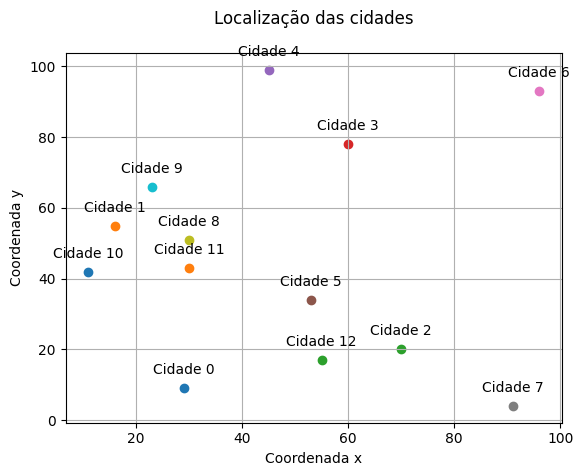

In [966]:
plotar_cidades(CIDADES)

In [967]:
populacao = populacao_caixeiros(TAMANHO_POPULACAO,CIDADES)
hall_da_fama = []
menores_fit =[]

for n in range(NUM_GERACOES):
    print(f'Geração {n+1} de {NUM_GERACOES}',end='\r')  #Apenas para ver o progresso
    # Seleção
    fitness = funcao_objetivo_pop_caixeiro(populacao,CIDADES)        
    selecionados = selecao_torneio_min(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamento_ordenado_parcial(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)                                                
    
    # Mutação
    mutacao_troca_parcial(proxima_geracao, CHANCE_DE_MUTACAO)
                                                                                                                                                                        
    # Atualização do hall da fama
    fitness = funcao_objetivo_pop_caixeiro(proxima_geracao,CIDADES)
        
    menor_fitness = min(fitness)
    menores_fit.append(menor_fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

<h5><p align = 'justify'> Para conferir o desempenho do melhor indivídio de cada geração e compreender o quão rapidamente o algoritmo genético encontra um bom indivíduo, exibimos o gráfico abaixo.</p> </h5>

[]

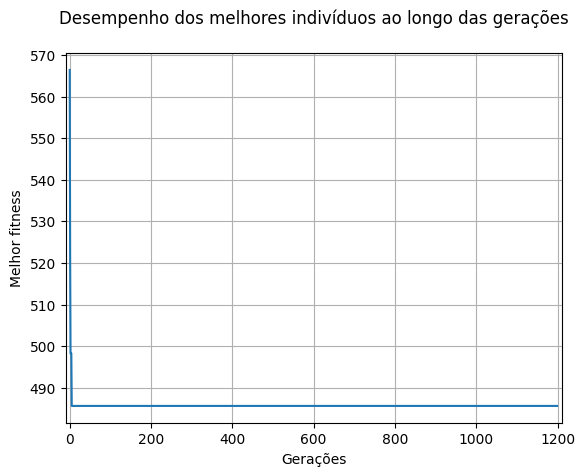

In [968]:
geracoes = np.arange(0,NUM_GERACOES)
plt.grid()
plt.plot(geracoes,menores_fit)
plt.xlabel('Gerações')
plt.ylabel('Melhor fitness')
inicio_observado = 0
plt.xlim([inicio_observado-10,NUM_GERACOES+10])
plt.title('Desempenho dos melhores indivíduos ao longo das gerações\n')
plt.plot()

<h5><p align = 'justify'> Ao fim, o trajeto feito pelo melhor indíviduo da última geração é exibido no mapa.</p> </h5>


Melhor individuo obtido por algoritmos genéticos:
['Cidade 0', 'Cidade 11', 'Cidade 1', 'Cidade 9', 'Cidade 3', 'Cidade 5', 'Cidade 7', 'Cidade 2', 'Cidade 12', 'Cidade 6', 'Cidade 4', 'Cidade 8', 'Cidade 10'] 
Distância: 485.6640291265092



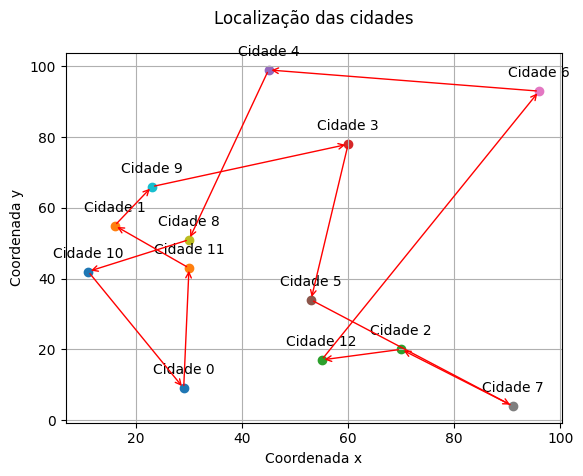

In [969]:
fitness = funcao_objetivo_pop_caixeiro(hall_da_fama,CIDADES)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
random_individuo = cria_canditado_caixeiro(CIDADES)

distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "\nDistância:", distancia)
print()
plotar_cidades(CIDADES, melhor_individuo_observado)

<p align = 'justify '> <b><h3>Referências:</h3></b>

[1] Daniel Cassar. ATP-303 GA 5.2 - Notebook do caixeiro viajante. 

[2] matplotlib.pyplot.arrow — Matplotlib 3.8.2 documentation. Disponível em: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html>.

‌
‌